# Heart Disease Prediction Using 9 Models

`Author:` [Fahad Ur Rehman](https://github.com/FahadUrRehman07)\
`Date:` 15.April.2024\
`Dataset:` [Hear Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

### `INSPIRATION OF THE PROJECT`
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using 9 models(`[LOGISTIC REGRESSION,KNN, NB,SVM, Random Forest, Decision Tree, XGBoost, GradientBoosting, AdaBoost]`).

### About Dataset (Meta data)
#### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id `(Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina.
  2. atypical angina.
  3. non-anginal.
  4. asymptomatic.
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:`[normal; fixed defect; reversible defect]
* `num:` the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Aims & Objectives
* we will fill this after some exploratory data analysis

# Import Libraries
lets start the project by importing all the libraries that we will need in the project.

In [ ]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
floa
# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [ ]:

df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

# print the first 5 rows of the dataframe
df.head()

# Exploratory Data Analysis (EDA)
### Explore Each Column

In [ ]:
# Exploring the data type of each column
df.info()

In [ ]:
# Checking the data shape
df.shape

In [ ]:
# Id column
df['id'].min(), df['id'].max()

In [ ]:
# age column
df['age'].min(), df['age'].max()

## Visualizations

In [ ]:
# lets summerize the age column
df['age'].describe()

NO missing values in the column so we are good to go...

In [ ]:
import seaborn as sns

# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

# Plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)

The age column distribution seems to be normaly distributed because we can clearly see the bill curve.

In [ ]:
# Plot the mean, Median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

Lets explore the gender base distribution of the dataset for age column

In [ ]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

In [ ]:
# Find the values of sex column
df['sex'].value_counts()

In [ ]:
# calculating the percentage fo male and female value counts in the data

male_count = 726
female_count = 194

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

In [ ]:
726/194

In [ ]:
# Find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

#### Exploring the dataset column

In [ ]:
# find the unique values in the dataset column
df['dataset'].value_counts()

In [ ]:
# plot the countplot of dataset column
fig =px.bar(df, x='dataset', color='sex')
fig.show()

# print the values of dataset column groupes by sex
print (df.groupby('sex')['dataset'].value_counts())

In [ ]:
# make a plot of age column using plotly and coloring by dataset

fig = px.histogram(data_frame=df, x='age', color= 'dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print ("Mode of the dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))
print("___________________________________________________________")

## Exploring CP (Chest Pain) column

In [ ]:
# value count of cp column
df['cp'].value_counts()

In [ ]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

In [ ]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

In [ ]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

### Let's explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.\
`Write here, what will happen if the blood pressure is high or low and then you canbin the data based on the those values.`

In [ ]:
# lets summerize the trestbps column
df['trestbps'].describe()

### **Handling missing values in trestbps column**

There are some missing values becuase total values is 920 but here we have 861

In [ ]:
# Dealing with Missing values in trestbps column.
# find the percentage of misssing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() /len(df) *100:.2f}%")

`Removing missing values using Iterative imputer`

In [ ]:
# Impute the missing values of trestbps column using iterative imputer
# create an object of iteratvie imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on trestbps column
imputer1.fit(df[['trestbps']])

# Transform the data
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

`Let impute other columns with missing values:`

In [ ]:
# First lets see data types or category of columns
df.info()

In [ ]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

`Impute missing values using iterative imputer for selected columns.`

columns are selected based on data types (floating data type)
because imputer only works with the floating data types.

selected columns are:
1. ca.
2. oldpeak
3. thal
4. chol
5. thalch

In [ ]:
# create an object of iterative imputer 
imputer2 = IterativeImputer(max_iter=10, random_state=42)

# fit transform on ca,oldpeak, thal,chol and thalch columns
df['ca'] = imputer2.fit_transform(df[['ca']])
df['oldpeak']= imputer2.fit_transform(df[['oldpeak']])
df['chol'] = imputer2.fit_transform(df[['chol']])
df['thalch'] = imputer2.fit_transform(df[['thalch']])

In [ ]:
# let's check again for missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

##### `***Lets impute the missing values in thal column by using ML models***`
All the coloumns are imputed which has floating data types and now lets impute the columns which has object data type.

* To handle the column having object data type we will use ML models.

In [ ]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

In [ ]:
df['thal'].value_counts()

In [ ]:
df.tail()


## Dealing with Missing  values (Categorical with Machine learning Models)

### Steps: 

1. FInd the collumns with missing values and store in an object
3. FInd the Columns based on data type
    1. Numeric columns.
    2. Categorical Columns.
    3. Boolean.
4. Define the function to impute missing values.
5. Apply the function to our dataset with missing values.
6. Check the missing values after imputation.

In [ ]:
# find missing values.
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

In [ ]:

missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

missing_data_cols

In [ ]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols

print(f'categorical Columns: {cat_cols}')
print(f'numerical Columns: {Num_cols}')

In [ ]:
# FInd columns 
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

### Imputing Missing Values with Machine learning model

In [ ]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

In [ ]:
df.isnull().sum().sort_values(ascending=False)

>`Now Missing values are imputed and there is no missing values in the columns....`

## `Dealing With Outliers`

>Let's create a box plots for all the numeric columns using for loop and subplot.
* By doing we will be able to analyze outliers in the columns.

In [ ]:
print("_________________________________________________________________________________________________________________________________________________")

sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()
##E6E6FA

### `ANALYSIS OF PLOT`
It seems there are outliers in the columns but we will examine it that its really the outliers or not because sometime these values come in outliers range but it really not.\
The outliers totally depends on the range which is different for every column in the dataset. 
##### `For Example:`
when we look into the plot and the column of age we can see that there are outliers. but these are not outliers lets the values.
* below 32 is all considere here is outliers but the age of 30 is possible and cannot be an outliers.
* `Let's explore the columns one by one`

## `1. Handling Outliers in Trestbps column`

In [ ]:
# print the row from df where trestbps value is 0
df[df['trestbps']==0]

In [ ]:
# Remove the column because it is an outlier because trestbps cannot be zero.
df= df[df['trestbps']!=0]

##### `Let's see again to check the outliers:`

In [ ]:
sns.set(rc={"axes.facecolor":"#B76E79","figure.facecolor":"#C0C0C0"})
modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)

plt.figure(figsize=(10,8))



for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=modified_palette[i % len(modified_palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()

##### `Analysis of the plot`

According to the plot in the trestbps column there are come values which are too far from the data. but they are not outliers if we look the other attributes of the data

In [ ]:
df.trestbps.describe()

## `2. Handling Oldpeak Outliers`

In [ ]:
df.describe()

In [ ]:
print("___________________________________________________________________________________________________________________________________________________________________")

# Set facecolors
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define the "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

# Use the "night vision" palette for the plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(x=df[col], color=night_vision_palette[i % len(night_vision_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()

#### `Analysis of the plot`

we can observe in the plot that -2 has removed.

## `3. Handling Outliers in Age Column`

In [ ]:
df.age.describe()

>* `Minimum age is 31 to have chest pain which can be possible so its not an outlier.`\
_We have observed that the minimum age for experiencing chest pain is 31, any observation at this age wouldn't be considered an outlier within the context of age-related data. Outliers typically deviate significantly from the majority of observations, but in this case, 31 falls within the expected range for experiencing chest pain._
>* `max age is 77 which is also possible so its not an outlier as well.`\
_The maximum age for experiencing chest pain is 77, any observation at this age wouldn't be classified as an outlier within the dataset. Outliers are typically defined as values that significantly deviate from the majority, but in this case, 77 falls within the expected range for chest pain occurrences._

## `4. Handling trestbps column outliers`

In [ ]:
palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=df, 
             x='trestbps', 
             kde=True,
             color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2]

In [ ]:
# create a histplot trestbops column to analyse with sex column
sns.histplot(df, x='trestbps', kde=True, palette = "Spectral", hue ='sex')

##### `Analysis of plot`

> * Everything seems ok and there is no outliers in the columns.
> * Columns are cleaned from outliers and missing values and we have already analysis the data.
> * The next step should be Model building.

# `Machine Learning Models`

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.head()

`Feature that we will be using in Machine Learning Models building`

The Targeted column is `num` which is the predicted attribute. We will use this column to predict the heart disease.
The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart diseases.

* `0 = no heart disease.`
* `1 = Mild Heart Disease types.`
* `2 = Moderate Heart Disease type.`
* `3 =  Severe Heart Disease type.`
* `4 =  Critical Heart Disease type.`

In [ ]:
# split the data into X and y
X= df.drop('num', axis=1)
y = df['num']

"""encode X data using separate label encoder for all categorical columns and save it for inverse transform"""
# Task: Separate Encoder for all categorical and object columns and inverse transform at the end. 
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass
        

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Stacking models in machine learning is an ensemble learning technique where multiple models (often referred to as base learners) are trained to make predictions, and then a meta-model (also called a "stacking model" or "meta-learner") is trained to combine the outputs of these base models to make a final prediction.

Algorithms/Classifiers used:
- KNeighbors
- Support Vector Classifier
- Decision tree
- Random forest
- Multi Level Perceptron
- Stack classifier using Logistic Regression as meta-model

Goal
- Leverage the stregnths of different algorithms to reduce bias and variance
- Allow the base models to complement each other, as each might capture different patterns in the data
- Improve performance if the base models have complementary strengths

In [93]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.7315598548972189
- MCC: 0.595234250509747
- F1 score: 0.704783279963802
----------------------------------
Model performance for Test set
- Accuracy: 0.5978260869565217
- MCC: 0.3949090787927903
- F1 score: 0.5374007107023412


In [96]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.391304347826087
- MCC: 0.0
- F1 score: 0.22010869565217392


In [97]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.7073760580411125
- MCC: 0.5656421644035877
- F1 score: 0.6879906285049767
----------------------------------
Model performance for Test set
- Accuracy: 0.5978260869565217
- MCC: 0.40495546699664936
- F1 score: 0.5725155279503106


In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.9818621523579202
- MCC: 0.9735590638180661
- F1 score: 0.9817890045872876
----------------------------------
Model performance for Test set
- Accuracy: 0.6086956521739131
- MCC: 0.4169414999064299
- F1 score: 0.5833969418044851


In [99]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.5937122128174124
- MCC: 0.4401720897576887
- F1 score: 0.6000623618170055
----------------------------------
Model performance for Test set
- Accuracy: 0.5434782608695652
- MCC: 0.38545496279804636
- F1 score: 0.5349931268430036


In [100]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.879081015719468
- MCC: 0.8217408573731396
- F1 score: 0.8626286238787959
----------------------------------
Model performance for Test set
- Accuracy: 0.6086956521739131
- MCC: 0.40977619037663576
- F1 score: 0.5699318466777842


# Results

In [102]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'stack': stack_model_train_f1}

In [103]:
mcc_train_list

{'knn': 0.595234250509747,
 'svm_rbf': 1.0,
 'dt': 0.5656421644035877,
 'rf': 0.9735590638180661,
 'mlp': 0.4401720897576887,
 'stack': 0.8217408573731396}

In [104]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.731560,0.595234,0.704783
svm_rbf,1.000000,1.000000,1.000000
dt,0.707376,0.565642,0.687991
rf,0.981862,0.973559,0.981789
mlp,0.593712,0.440172,0.600062
stack,0.879081,0.821741,0.862629


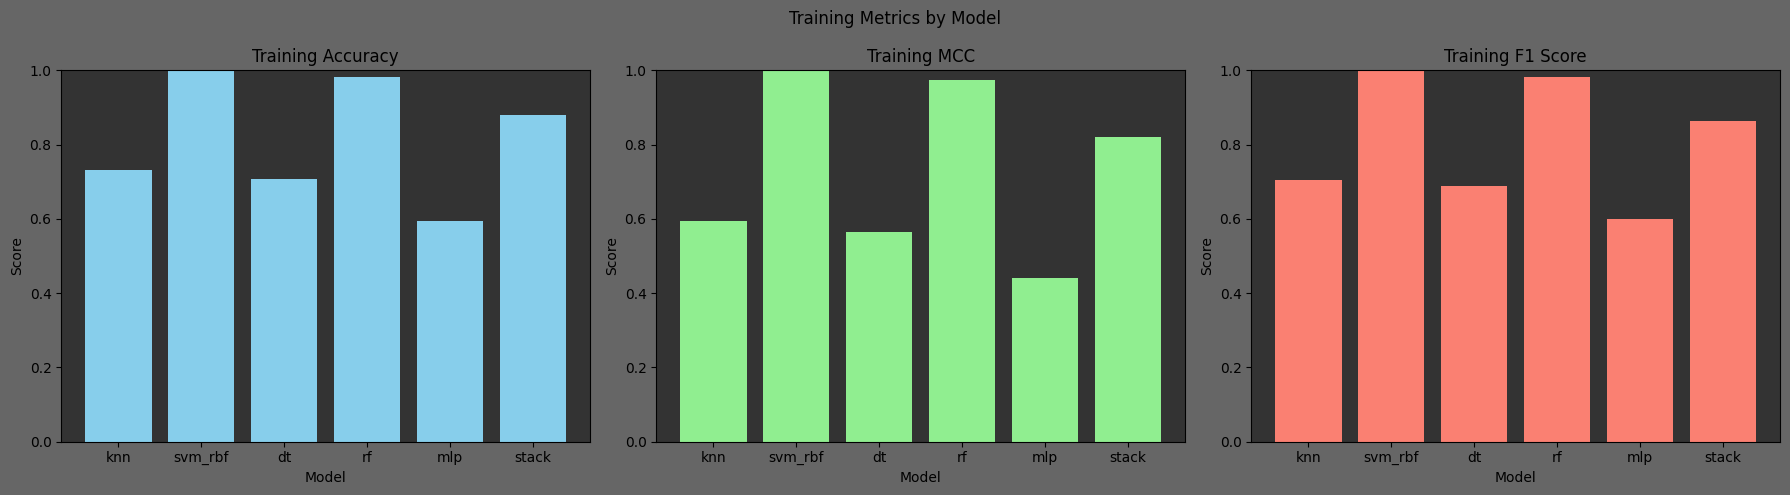

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy
axs[0].bar(acc_train_list.keys(), acc_train_list.values(), color='skyblue')
axs[0].set_title('Training Accuracy')
axs[0].set_ylim(0, 1)

# MCC
axs[1].bar(mcc_train_list.keys(), mcc_train_list.values(), color='lightgreen')
axs[1].set_title('Training MCC')
axs[1].set_ylim(0, 1)

# F1 Score
axs[2].bar(f1_train_list.keys(), f1_train_list.values(), color='salmon')
axs[2].set_title('Training F1 Score')
axs[2].set_ylim(0, 1)

for ax in axs:
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')

plt.suptitle('Training Metrics by Model')
plt.tight_layout()
plt.show()


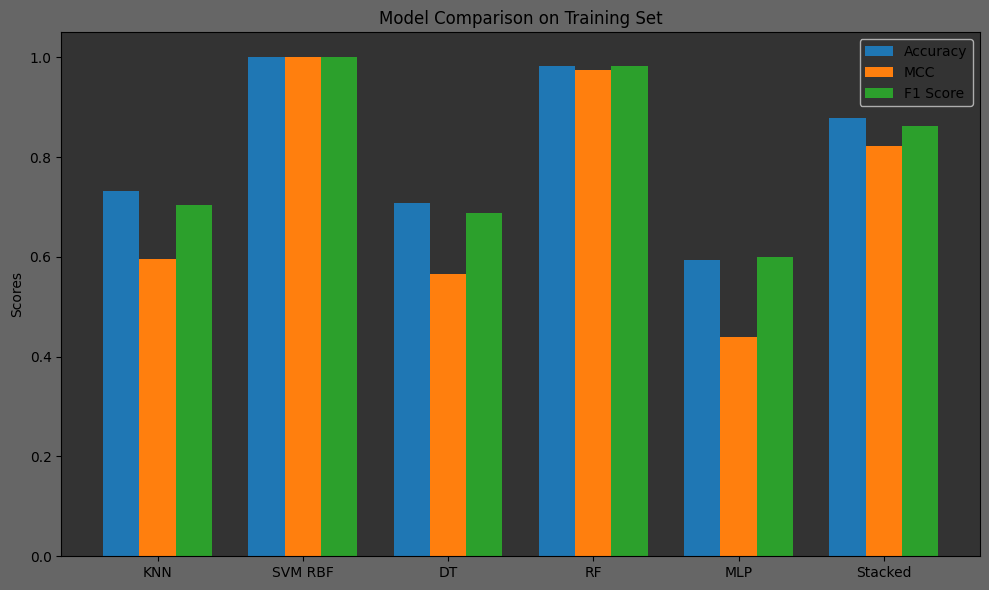

In [110]:
# Example data structure
model_names = ['KNN', 'SVM RBF', 'DT', 'RF', 'MLP', 'Stacked']
accuracy = [knn_train_accuracy, svm_rbf_train_accuracy, dt_train_accuracy, rf_train_accuracy, mlp_train_accuracy, stack_model_train_accuracy]
mcc = [knn_train_mcc, svm_rbf_train_mcc, dt_train_mcc, rf_train_mcc, mlp_train_mcc, stack_model_train_mcc]
f1 = [knn_train_f1, svm_rbf_train_f1, dt_train_f1, rf_train_f1, mlp_train_f1, stack_model_train_f1]

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, mcc, width, label='MCC')
ax.bar(x + width, f1, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison on Training Set')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
plt.show()

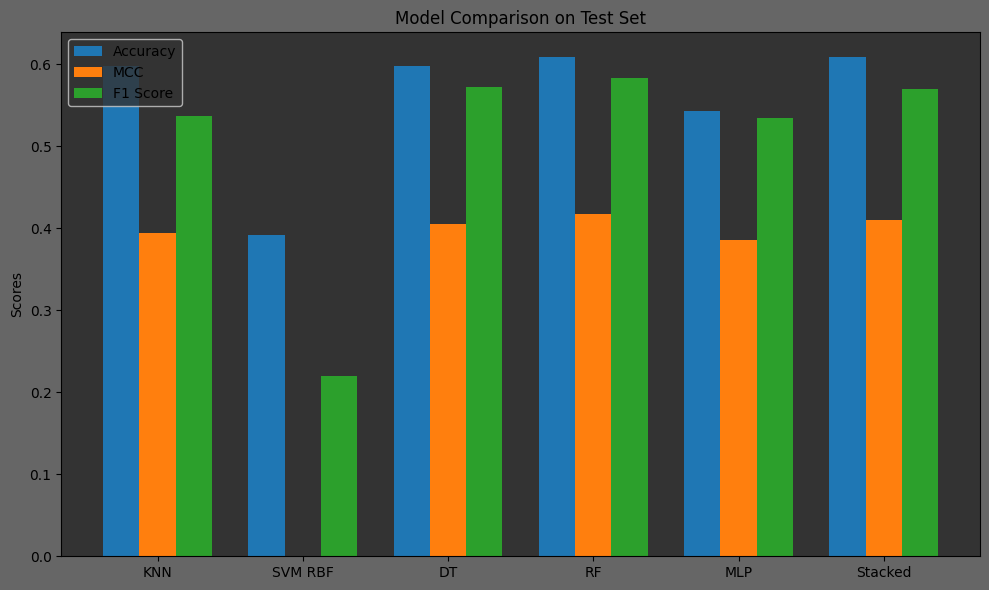

In [111]:
# Example data structure
model_names = ['KNN', 'SVM RBF', 'DT', 'RF', 'MLP', 'Stacked']
accuracy = [knn_test_accuracy, svm_rbf_test_accuracy, dt_test_accuracy, rf_test_accuracy, mlp_test_accuracy, stack_model_test_accuracy]
mcc = [knn_test_mcc, svm_rbf_test_mcc, dt_test_mcc, rf_test_mcc, mlp_test_mcc, stack_model_test_mcc]
f1 = [knn_test_f1, svm_rbf_test_f1, dt_test_f1, rf_test_f1, mlp_test_f1, stack_model_test_f1]

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, mcc, width, label='MCC')
ax.bar(x + width, f1, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison on Test Set')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
plt.show()